In [190]:
import pandas as pd 
import numpy as np

In [191]:
from matplotlib import pyplot as plt

In [192]:
df = pd.read_csv('/Users/gabrielburcea/pyprojects/cloudacademy/datasets/banknotes.csv')

In [193]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [194]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [196]:
import seaborn as sns

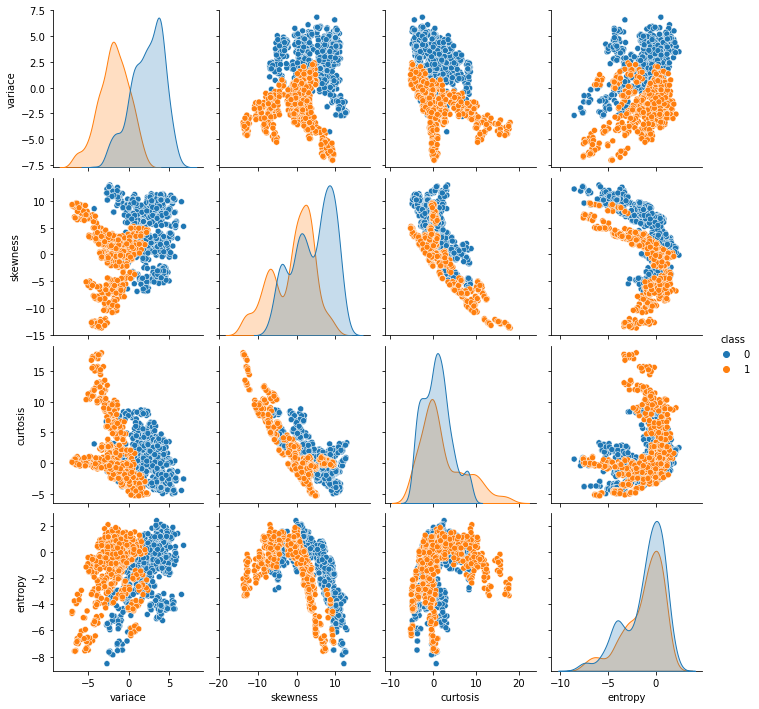

In [197]:
sns.pairplot(df, hue="class")

### Baseline model

In [198]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [199]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [200]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99272727, 0.99272727, 0.99635036, 0.99635036, 0.99635036])

### Logistic Regression model

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)


In [203]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [204]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape = (4,), activation = 'sigmoid'))

model.compile(loss ='binary_crossentropy', 
             optimizer ='sgd', 
             metrics =['accuracy'])



history = model.fit(X_train, y_train, epochs = 10)
result = model.evaluate(X_test, y_test, verbose = 0)

Epoch 1/10
30/30 [==============================] - 0s 685us/step - loss: 1.8644 - accuracy: 0.3156
Epoch 2/10
30/30 [==============================] - 0s 661us/step - loss: 1.6501 - accuracy: 0.3281
Epoch 3/10
30/30 [==============================] - 0s 737us/step - loss: 1.4487 - accuracy: 0.3396
Epoch 4/10
30/30 [==============================] - 0s 753us/step - loss: 1.2628 - accuracy: 0.3573
Epoch 5/10
30/30 [==============================] - 0s 761us/step - loss: 1.0957 - accuracy: 0.3750
Epoch 6/10
30/30 [==============================] - 0s 914us/step - loss: 0.9504 - accuracy: 0.4187
Epoch 7/10
30/30 [==============================] - 0s 825us/step - loss: 0.8285 - accuracy: 0.4604
Epoch 8/10
30/30 [==============================] - 0s 748us/step - loss: 0.7299 - accuracy: 0.5229
Epoch 9/10
30/30 [==============================] - 0s 784us/step - loss: 0.6527 - accuracy: 0.6177
Epoch 10/10
30/30 [==============================] - 0s 805us/step - loss: 0.5931 - accuracy: 0.7458

In [205]:
historydf = pd.DataFrame(history.history, index = history.epoch)

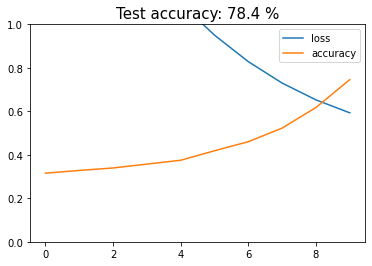

In [206]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15);

### Learning Rates

In [207]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [208]:
historydf = pd.concat(dflist, axis=1)

In [209]:
historydf = pd.concat(dflist, axis = 1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                names =['learning_rate', 'metric'])
historydf.columns = idx

In [210]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss  accuracy      loss  accuracy      loss  accuracy   
0              0.686575  0.583333  0.646328  0.621875  0.586320  0.728125   
1              0.594006  0.637500  0.418092  0.844792  0.303590  0.914583   
2              0.522978  0.698958  0.336319  0.894792  0.237614  0.929167   
3              0.469180  0.771875  0.289218  0.912500  0.198340  0.941667   
4              0.428353  0.843750  0.255613  0.923958  0.172089  0.954167   
5              0.396852  0.891667  0.230046  0.938542  0.153154  0.958333   
6              0.371970  0.902083  0.209736  0.946875  0.138725  0.963542   
7              0.351748  0.910417  0.193301  0.952083  0.127657  0.969792   
8              0.334875  0.916667  0.179719  0.956250  0.118697  0.969792   
9              0.320505  0.920833  0.168262  0.958333  0.111484  0.969792   

learning_rate      0.50            
metric             loss  accuracy  
0              0.255158  0.932292  
1              0.122688  0.967708  
2              0.093605  0.972917  
3              0.079401  0.978125  
4              0.070598  0.979167  
5              0.064678  0.978125  
6              0.060620  0.979167  
7              0.057428  0.981250  
8              0.054639  0.981250  
9              0.052567  0.980208

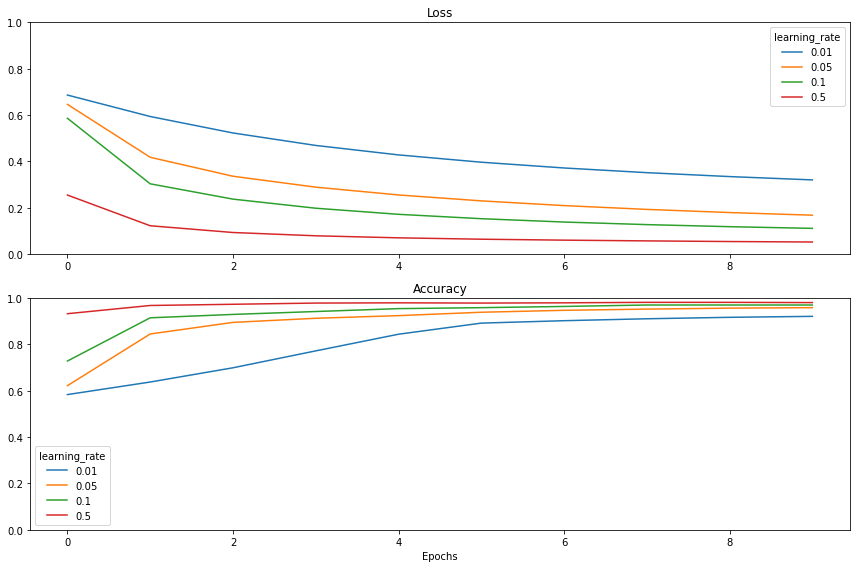

In [211]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

In [212]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [213]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [214]:
historydf

batch_size       16                  32                  64             \
metric          loss  accuracy      loss  accuracy      loss  accuracy   
0           0.767633  0.609375  0.886692  0.503125  0.635893  0.702083   
1           0.588752  0.675000  0.773978  0.528125  0.625022  0.709375   
2           0.477993  0.780208  0.684337  0.569792  0.614753  0.713542   
3           0.411646  0.860417  0.614914  0.631250  0.604988  0.715625   
4           0.370226  0.904167  0.561709  0.729167  0.595670  0.718750   
5           0.342699  0.904167  0.520611  0.815625  0.586788  0.720833   
6           0.322950  0.913542  0.488420  0.846875  0.578314  0.725000   
7           0.307895  0.917708  0.462684  0.860417  0.570191  0.727083   
8           0.295758  0.919792  0.441655  0.862500  0.562361  0.727083   
9           0.285586  0.922917  0.424188  0.869792  0.554861  0.732292   

batch_size       128            
metric          loss  accuracy  
0           0.706333  0.470833  
1           0.687852  0.564583  
2           0.670855  0.695833  
3           0.654776  0.848958  
4           0.639515  0.907292  
5           0.625278  0.948958  
6           0.611843  0.970833  
7           0.599332  0.979167  
8           0.587551  0.975000  
9           0.576441  0.970833

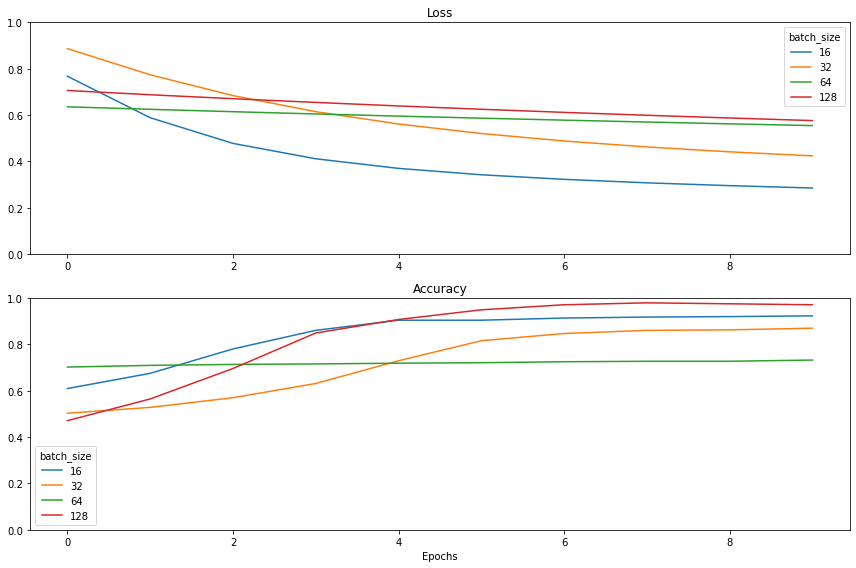

In [215]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

In [216]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [217]:
dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [218]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

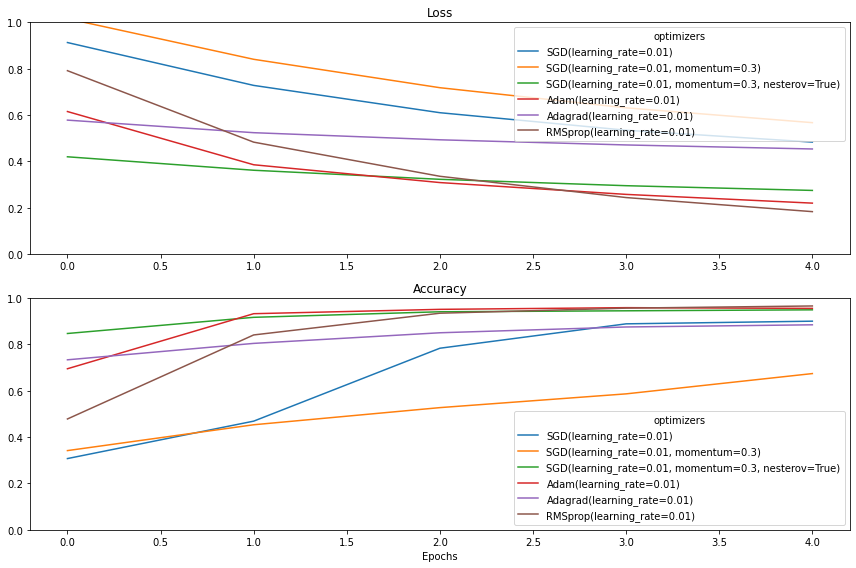

In [219]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

###  Initialization

https://keras.io/initializers/

In [220]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [221]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

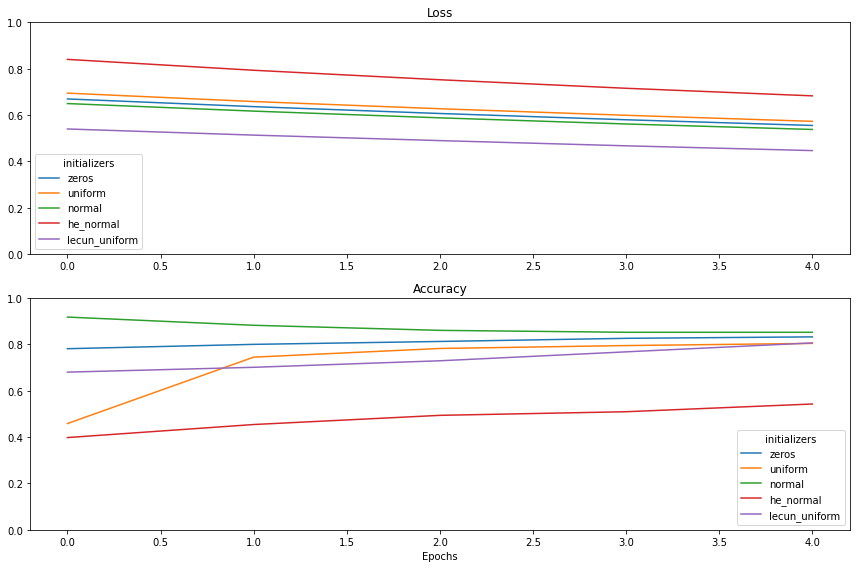

In [222]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Inner layer representation

In [223]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Epoch 1/20
42/42 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.8884 - val_loss: 0.3784 - val_accuracy: 0.9653
Epoch 2/20
42/42 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.9688 - val_loss: 0.2634 - val_accuracy: 0.9757
Epoch 3/20
42/42 [==============================] - 0s 1ms/step - loss: 0.2099 - accuracy: 0.9881 - val_loss: 0.1917 - val_accuracy: 0.9931
Epoch 4/20
42/42 [==============================] - 0s 1ms/step - loss: 0.1581 - accuracy: 0.9821 - val_loss: 0.1444 - val_accuracy: 0.9965
Epoch 5/20
42/42 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.9851 - val_loss: 0.1095 - val_accuracy: 0.9931
Epoch 6/20
42/42 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9807 - val_loss: 0.0872 - val_accuracy: 0.9861
Epoch 7/20
42/42 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9807 - val_loss: 0.0709 - val_accuracy: 0.9826
Epoch 8/20
42/42 [==

In [224]:
result

[0.030252249911427498, 0.987864077091217]

In [225]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [226]:
model.layers

In [227]:
inp = model.layers[0].input
out = model.layers[0].output

In [229]:
inp

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense_input')>

In [230]:
out

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense')>

In [231]:
features_function = K.function([inp], [out])

In [232]:
features_function

<function keras.backend.function.<locals>.func(model_inputs)>

In [233]:
features_function([X_test])[0].shape

(412, 2)

In [234]:
features = features_function([X_test])[0]

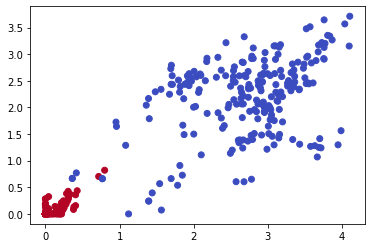

In [235]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [236]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

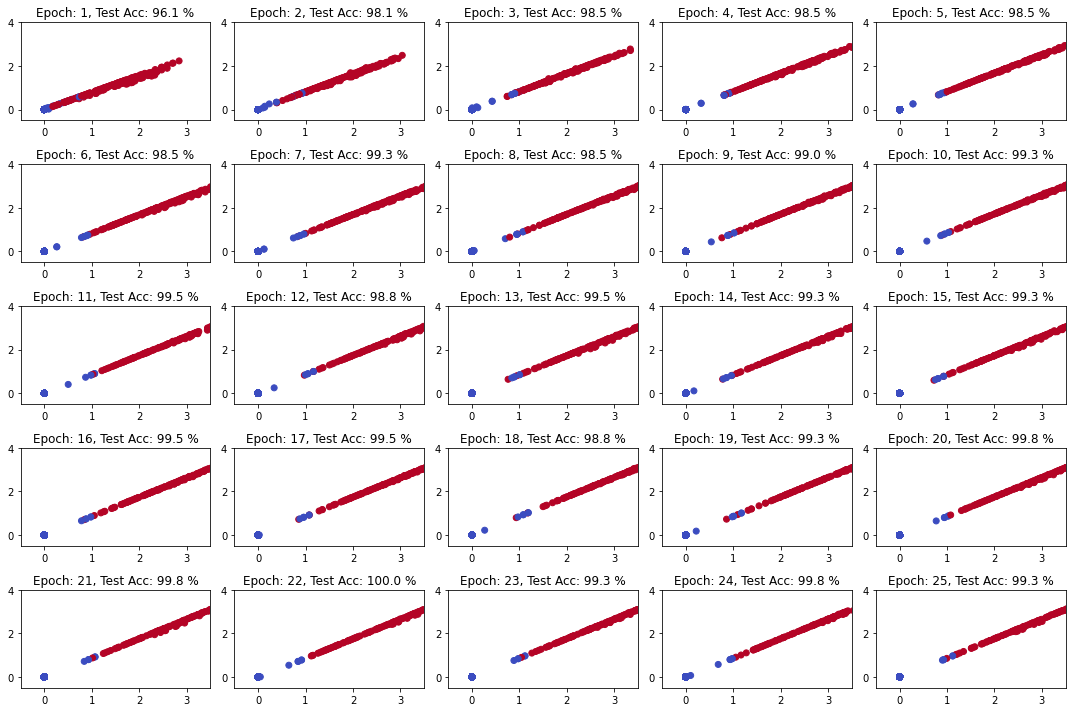

In [237]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

* Load the ../data/wines.csv into Pandas
* Use the column called "Class" as target
* Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
* Use all the other columns as features, check their range and distribution (using seaborn pairplot)
* Rescale all the features using either MinMaxScaler or StandardScaler
* Build a deep model with at least 1 hidden layer to classify the data
* Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
* Choose an optimizer
* Choose a value for the learning rate, you may want to try with several values
* Choose a batch size
* Train your model on all the data using a validation_split=0.2. Can you converge to 100% validation accuracy?
* What's the minumum number of epochs to converge?
* Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

* Build a deep fully connected network with the following structure:
    * Layer 1: 8 nodes
    * Layer 2: 5 nodes
    * Layer 3: 2 nodes
    * Output : 3 nodes
* Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
* Remember to train the model on the scaled data
* Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
* Calculate the features and plot them on a 2-dimensional scatter plot
* Can we distinguish the 3 classes well?

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its documentation here. Let's see how we can leverage it.

* define an input layer called inputs
* define two hidden layers as before, one with 8 nodes, one with 5 nodes
* define a second_to_last layer with 2 nodes
* define an output layer with 3 nodes
* create a model that connect input and output
* train it and make sure that it converges
* define a function between inputs and second_to_last layer
* recalculate the features and plot them

### Exercise 4

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their documentation is here. Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

* Split the data into train and test sets with a test_size = 0.3 and random_state=42
* Reset and recompile your model
* train the model on the train data using validation_data=(X_test, y_test)
* Use the EarlyStopping callback to stop your training if the val_loss doesn't improve
* Use the ModelCheckpoint callback to save the trained model to disk once training is finished
* Use the TensorBoard callback to output your training information to a /tmp/ subdirectory
* Watch the next video for an overview of tensorboard